In [4]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, LSTM, Dropout, Bidirectional, Dense, Embedding, GRU
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/CommentToxicity-main-20240607T002428Z-001/CommentToxicity-main/jigsaw-toxic-comment-classification-challenge/train.csv/train.csv')
X = df['comment_text']
y = df[df.columns[2:]].values

MAX_FEATURES = 200000
vectorizer = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=1800, output_mode='int')
vectorizer.adapt(X.values)
vectorized_text = vectorizer(X.values)

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache().shuffle(160000).batch(16).prefetch(8)

train_size = int(len(dataset) * 0.7)
val_size = int(len(dataset) * 0.2)
test_size = int(len(dataset) * 0.1)

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size).take(test_size)

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
lstm_model = Sequential()
lstm_model.add(Embedding(MAX_FEATURES + 1, 32))
lstm_model.add(Bidirectional(LSTM(32, activation='tanh')))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(256, activation='relu'))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(6, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam')
lstm_history = lstm_model.fit(train_dataset, epochs=5, validation_data=val_dataset)


Epoch 1/5
6981/6981 [==============================] - 857s 122ms/step - loss: 0.0625 - val_loss: 0.0467
Epoch 2/5
6981/6981 [==============================] - 739s 106ms/step - loss: 0.0461 - val_loss: 0.0391
Epoch 3/5
6981/6981 [==============================] - 735s 105ms/step - loss: 0.0409 - val_loss: 0.0365
Epoch 4/5
6981/6981 [==============================] - 707s 101ms/step - loss: 0.0363 - val_loss: 0.0315
Epoch 5/5
6981/6981 [==============================] - 728s 104ms/step - loss: 0.0327 - val_loss: 0.0279


In [6]:
lstm_model.save('/content/drive/MyDrive/lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# gru_model.save('/content/drive/MyDrive/lstm_model.h5')

In [8]:
from tensorflow.keras.models import load_model

# Load the model
loaded_lstm_model = load_model('/content/drive/MyDrive/lstm_model.h5')
loaded_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [8]:
gru_model = Sequential()
gru_model.add(Embedding(MAX_FEATURES + 1, 32))
gru_model.add(Bidirectional(GRU(32, activation='tanh')))
gru_model.add(Dense(128, activation='relu'))
gru_model.add(Dense(256, activation='relu'))
gru_model.add(Dense(128, activation='relu'))
gru_model.add(Dense(6, activation='sigmoid'))

gru_model.compile(loss='binary_crossentropy', optimizer='adam')
gru_history = gru_model.fit(train_dataset, epochs=5, validation_data=val_dataset)


Epoch 1/5
6981/6981 [==============================] - 806s 115ms/step - loss: 0.0595 - val_loss: 0.0437
Epoch 2/5
6981/6981 [==============================] - 742s 106ms/step - loss: 0.0430 - val_loss: 0.0383
Epoch 3/5
6981/6981 [==============================] - 714s 102ms/step - loss: 0.0377 - val_loss: 0.0325
Epoch 4/5
6981/6981 [==============================] - 687s 98ms/step - loss: 0.0334 - val_loss: 0.0289
Epoch 5/5
6981/6981 [==============================] - 680s 97ms/step - loss: 0.0290 - val_loss: 0.0247


In [9]:
gru_model.save('/content/drive/MyDrive/gru_model.h5')

In [10]:
from tensorflow.keras.models import load_model

# Load the model
loaded_gru_model = load_model('/content/drive/MyDrive/gru_model.h5')
loaded_gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                12672     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

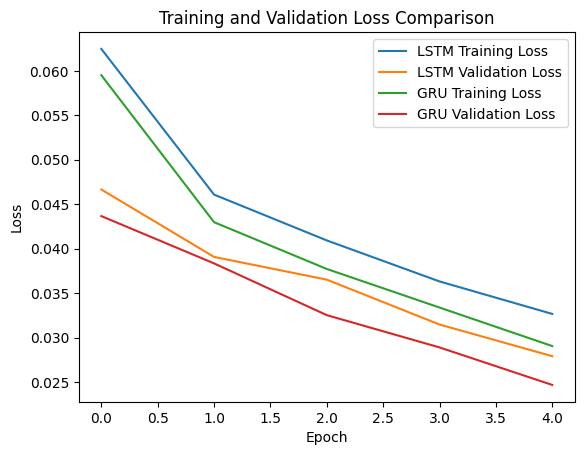

In [11]:
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
# lstm_loss = lstm_model.evaluate(test_dataset)
# gru_loss, gru_accuracy = gru_model.evaluate(test_dataset)

# print("LSTM Model - Test Loss:", lstm_loss)
# print("LSTM Model - Test Accuracy:", lstm_accuracy)
# print("GRU Model - Test Loss:", gru_loss)
# print("GRU Model - Test Accuracy:", gru_accuracy)


In [9]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.4 MB/s et

In [10]:
import gradio as gr

def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    lstm_results = lstm_model.predict(vectorized_comment)
    gru_results = gru_model.predict(vectorized_comment)

    lstm_text = ''
    gru_text = ''
    for idx, col in enumerate(df.columns[2:]):
        lstm_text += '{} (LSTM): {}\n'.format(col, lstm_results[0][idx] > 0.5)
        gru_text += '{} (GRU): {}\n'.format(col, gru_results[0][idx] > 0.5)

    return lstm_text, gru_text

interface = gr.Interface(fn=score_comment, inputs=gr.Textbox(lines=2, placeholder='Comment to score'), outputs=['text', 'text'])
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a090a6a9cdf6829320.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
